In [16]:
import numpy as np
import math
from IPython.display import Markdown as md
from math import *
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

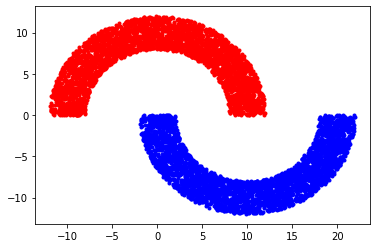

printing least mean square error without sigmoid epoch number 0 : 0.22560398166858026
 
printing least mean square error without sigmoid epoch number 1 : 0.22090430444546996
 
printing least mean square error without sigmoid epoch number 2 : 0.21987785982667735
 
printing least mean square error without sigmoid epoch number 3 : 0.21946882662968878
 
Accuracy 0.7825714285714286
 78.25714285714285 % 


In [26]:

def make_half_moons(n_samples, radius, width, distance):
   
    """
    The function make_half_moons takes as input:
    n_samples = number of data samples to be generated
    radius = central radius of the half-moon
    width = width of the half-moon
    distance = distance between the two half-moons
    
    and returns as output the dataset generated and shuffled
    data_set = the shuffled and combined dataset with 3 rows (as x_cord, y_cord
               and labels) and n_samples columns
    """
    
    # Initialise dummy variables
    num_rows = 3
    num_cols = n_samples
    r = radius
    w = width
    d = distance
    n = [0 for i in range(n_samples)]
    m = [0 for i in range(n_samples)]
    


    
    # Check for boundary conditions
    if(r < w/2):
        print("\nError: Radius should atleast be larger than half the width.")
            
    if(num_cols%2 != 0):
        print("\nError: Number of samples should be even.")
        num_cols -= 1
    
    # Create random 2D array of floats between 0.0 and 1.0
    a = np.random.rand(num_rows, num_cols//2)
    
    # Define rad for first half of records
    rad = (r - w/2) + w*a[0][:]
    
    # Define theta for second half of records
    theta = np.pi*a[1][:]
    
    # Create data-set
    # First half-moon data
    x1 = np.multiply(rad, np.cos(theta))
    y1 = np.multiply(rad, np.sin(theta))
    label1 = 1*np.ones((1, len(x1)), dtype=int)
    label1 = np.hstack(label1)
   # print(label1)
    
    # Second half-moon data
    x2 = np.multiply(rad, np.cos(-theta)) + r
    y2 = np.multiply(rad, np.sin(-theta)) - d
    label2 = 0*np.ones((1, len(x2)), dtype=int)
    label2 = np.hstack(label2)
   # print(label2)
    
    # Create dataset by combining all values of x's and y's and
    # labels, and shuffling them randomly.
    x = np.concatenate((x1, x2))
    y = np.concatenate((y1, y2))
    labels = np.concatenate((label1, label2))
    #print(x)
    #print(x1)
    
    def sigmoid(b):
        return 1 / (1 + math.exp(-b))
    sigmoid_v = np.vectorize(sigmoid)
                
    
    
    
  


    
    # Create coordinate-type dataset from individual values
    # so that we have a dataset of type Xi = [[x, y], label]
    X = np.zeros((len(x), 2))
    
        
    
    k = 0
    for i, j in zip(x, y):
        X[k][0] = i
        X[k][1] = j
        
        k += 1
        
    
    data_set = [X, labels]
    #print(label1) 
    
        
    # Plot a half-moon graph for given dataset
    plt.plot(x1, y1, "r.", x2, y2, "b.")
    plt.show()
    

    #int(data_set)
    #print(x1)
   # print(y1)
    #print("printing labels")
    #print(labels[0])
    alpha=0.01  #---------------------------------------------------------------initializing learning rate
    
    weights = np.zeros((1,2), dtype=float) #initializing weights
    error_lms = 0
    error_lms_Sig = 0
    threshold = 0.2192254930413396 #---------------------------------------------THRESHold
    #threshold_1= 0.21442857142857144 #--------------------------------------------------------------threshold 2
   
    actual_result = 0
    l = 0
    epoch = 50
    for j in range(epoch):
        for i in range (0,1999):                       # training 2000 data
        
        
            actual_result = weights[0][0]*X[i][0] + weights[0][1]*X[i][1]
            #actual_result = np.dot(weights[0][k],X[i])
          # print(sigmoid_v(actual_result))
      #  print(sigmoid(actual_result))
            #print(actual_result)
            actual_result = sigmoid_v(actual_result)
        #print(actual_result)
        
       # print(label1[i])
            
            if actual_result > 0.5:
                fx = 1
           # print("greater than 0.5")
            if actual_result <= 0.5:
                fx = 0
            #print("less than 0.5")
        
          
        
            if fx != labels[i]:
                error = labels[i] - fx
                
                
                
                weights[0][0] = weights[0][0] + alpha*error*X[i][0] #------------------updating the weights
                weights[0][1] = weights[0][1] + alpha*error*X[i][1]
            
            #print(weights[:])
            #print (labels)
                
                #print("learning")
            else:
                if fx == labels[i]:
                    weights[0][0] = weights[0][0]
                    weights[0][1] = weights[0][1]
                    #print("no error")  
                    
            n[i]=fx                                                            #storing value of fx in list
            m[i]=actual_result                                                 #storing value of actual result
        error_lms = mean_squared_error(labels[:], m[:]) #-----------------------using least mean square function
        if(error_lms<threshold):
            break
        print("printing least mean square error without sigmoid epoch number", + j, ":", + error_lms) 
       # error_lms_sig = mean_squared_error(labels[:], n[:])  
       # if(error_lms<threshold_1): #---------------------------------------------using least mean square function
         #   break
        #print("printing least mean square error with sigmoid epoch number", + j ,":", + error_lms_sig)
        print(" ")         
            
            
    for j in range(epoch):
        for i in range (2000,7000):                                          # testing the 5000 data
        
        
            actual_result = weights[0][0]*X[i][0] + weights[0][1]*X[i][1]
            actual_result = sigmoid_v(actual_result)
            if actual_result > 0.5:
                fx = 1
               # print("greater than 0.5")
            if actual_result <= 0.5:
                fx = 0
                #print("less than 0.5")
        
              
          # n[i]=fx #storing value of fx in list
          #m[i]=actual_result
      #  error_lms = mean_squared_error(labels[:], m[:])
      #  print("printing least mean square error without sigmoid epoch number", + j, ":", + error_lms)
      #  error_lms_sig = mean_squared_error(labels[:], n[:])
       # print("printing least mean square error with sigmoid epoch number", + j ,":", + error_lms_sig)
        #print(" ")
        
    
    acc = accuracy_score(labels[:],n[:])
    print ("Accuracy",+accuracy_score(labels[:],n[:])) #finding accuracy
    print('\033[1m',  (accuracy_score(labels[:],n[:]) *100),'%' , '\033[0m')
    
    
    #return data_set
    
    

make_half_moons(7000, 10, 4, 0)